In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error
import pickle
import matplotlib.pyplot as plt

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
data_breast_cancer

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

## Classification

In [3]:
X, y = data_breast_cancer.data, data_breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
for i in range(1, 10):
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree_clf.fit(X_train, y_train)
    print(i, ". Train f1: ", f1_score(y_train, tree_clf.predict(X_train)), "   Test f1: ", f1_score(y_test, tree_clf.predict(X_test)))

1 . Train f1:  0.9366197183098592    Test f1:  0.9130434782608696
2 . Train f1:  0.9452054794520547    Test f1:  0.9452054794520549
3 . Train f1:  0.9826388888888888    Test f1:  0.9583333333333334
4 . Train f1:  0.9965156794425087    Test f1:  0.9577464788732394
5 . Train f1:  0.9965156794425087    Test f1:  0.9577464788732394
6 . Train f1:  0.9982547993019197    Test f1:  0.951048951048951
7 . Train f1:  1.0    Test f1:  0.9577464788732394
8 . Train f1:  1.0    Test f1:  0.9577464788732394
9 . Train f1:  1.0    Test f1:  0.9577464788732394


In [5]:
tree_clf = DecisionTreeClassifier(max_depth=7, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [6]:
f = "bc"
export_graphviz(
        tree_clf,
        out_file=f,
        feature_names=data_breast_cancer.feature_names,
        class_names=[str(num)+", "+name
                     for num,name in
                     zip(set(data_breast_cancer.target),
                         data_breast_cancer.target_names)],
        rounded=True,
        filled=True
)

In [7]:
graphviz.render('dot', 'png', f)

'bc.png'

In [8]:
tree_depth = 7
f1_train = f1_score(y_train, tree_clf.predict(X_train))
f1_test = f1_score(y_test, tree_clf.predict(X_test))
score_train = accuracy_score(y_train, tree_clf.predict(X_train))
score_test = accuracy_score(y_test, tree_clf.predict(X_test))

f1acc_tree = [tree_depth, f1_train, f1_test, score_train, score_test]
f1acc_tree

[7, 1.0, 0.9577464788732394, 1.0, 0.9473684210526315]

In [9]:
f = open('f1acc_tree.pkl', 'wb')
pickle.dump(f1acc_tree, f)
f.close

<function BufferedWriter.close>

## Regression

<AxesSubplot:xlabel='x', ylabel='y'>

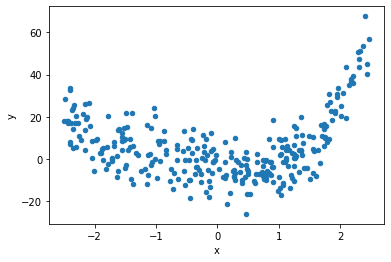

In [10]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [11]:
# rng = np.random.RandomState(1)
# X = np.sort(5 * rng.rand(80, 1), axis=0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

list = [[i] for i in sorted(X)]

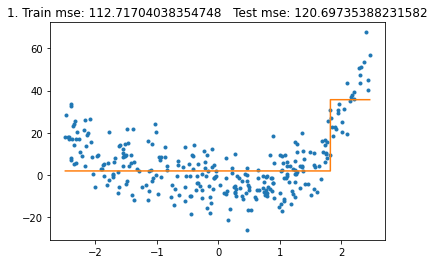

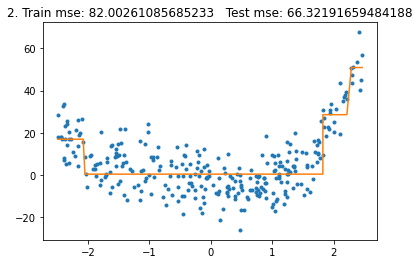

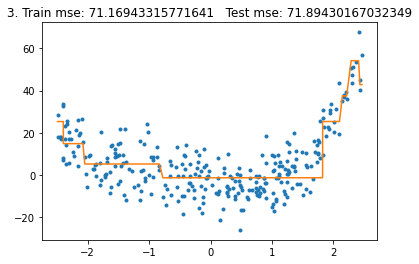

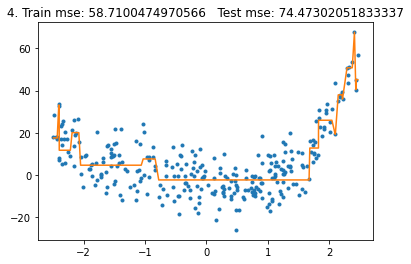

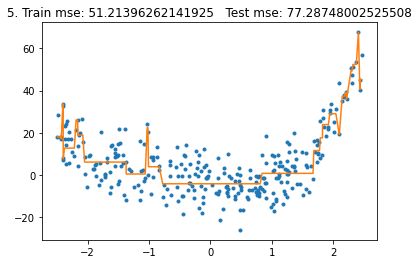

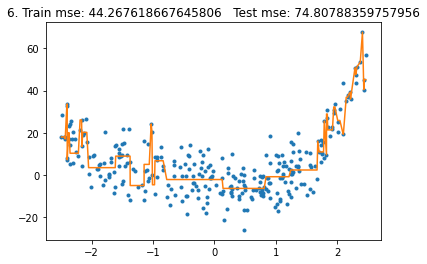

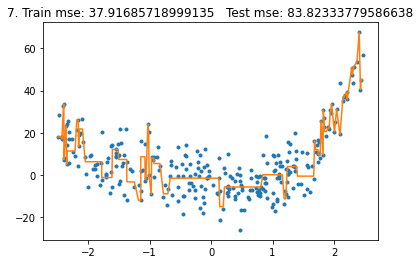

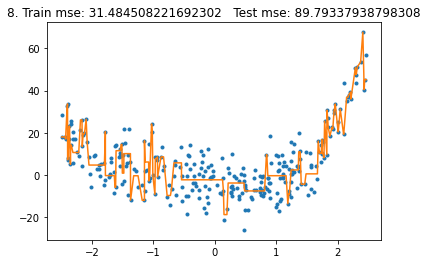

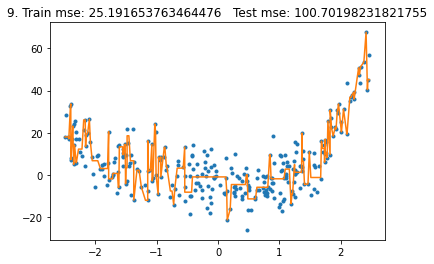

In [14]:
for i in range(1, 10):
    tree_clf = DecisionTreeRegressor(max_depth=i, random_state=42)
    tree_clf.fit(X_train, y_train)
    title = f'{i}. Train mse: {mean_squared_error(y_train, tree_clf.predict(X_train))}   Test mse: {mean_squared_error(y_test, tree_clf.predict(X_test))}'
    plt.figure(i)
    plt.title(title)
    plt.plot(X, y, '.', list, tree_clf.predict(list), '-')

In [15]:
tree_clf = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [16]:
f = "reg"
export_graphviz(
        tree_clf,
        out_file=f,
        rounded=True,
        filled=True
)

In [17]:
graphviz.render('dot', 'png', f)

'reg.png'

In [18]:
depth = 3
mse_train = mean_squared_error(y_train, tree_clf.predict(X_train))
mse_test = mean_squared_error(y_test, tree_clf.predict(X_test))
regression = [depth, mse_train, mse_test]

In [19]:
f = open("mse_tree.pkl", "wb")
pickle.dump(regression, f)
f.close()